# Esercizio 12.2 e 12.3

Dal momento che dall'esercizio precedente ho individuato Adagrad come miglior ottimizzatore, l'ho utilizzato anche per questo esercizio.

In [24]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [25]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()



# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')





# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)



X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [26]:
# you will need the following for Convolutional Neural Networks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(640, activation='softmax'))
    model.add(Dense(num_classes, activation='softmax'))

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adagrad',
                  metrics=['acc'])
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [27]:
# training parameters
batch_size = 32
epochs = 10

# create the deep conv net
model_CNN=create_CNN()


# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 70s 1ms/step - loss: 1.6601 - acc: 0.5830 - val_loss: 1.4106 - val_acc: 0.5978
Epoch 2/10
60000/60000 [==============================] - 69s 1ms/step - loss: 1.3285 - acc: 0.5965 - val_loss: 1.2156 - val_acc: 0.5968
Epoch 3/10
60000/60000 [==============================] - 69s 1ms/step - loss: 1.1866 - acc: 0.5983 - val_loss: 1.1093 - val_acc: 0.6047
Epoch 4/10
60000/60000 [==============================] - 70s 1ms/step - loss: 1.1016 - acc: 0.6018 - val_loss: 1.0389 - val_acc: 0.6045
Epoch 5/10
60000/60000 [==============================] - 70s 1ms/step - loss: 1.0439 - acc: 0.6054 - val_loss: 0.9898 - val_acc: 0.6088
Epoch 6/10
60000/60000 [==============================] - 69s 1ms/step - loss: 1.0036 - acc: 0.6081 - val_loss: 0.9531 - val_acc: 0.6073
Epoch 7/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.9686 - acc: 0.6094 - val_loss: 0.9239 - val_acc

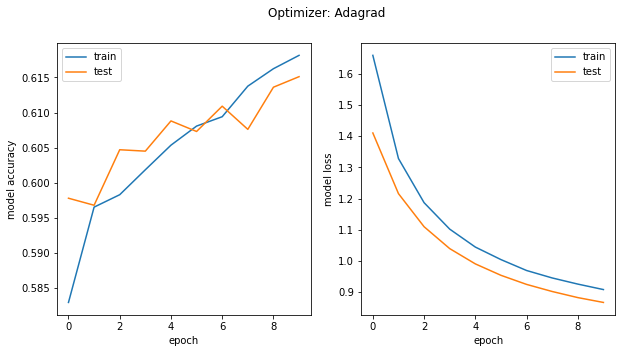

In [29]:

# summarize history for accuracy
fig=plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.suptitle("Optimizer: Adagrad")
plt.savefig("Grafici_1/12_2.png")
plt.show()




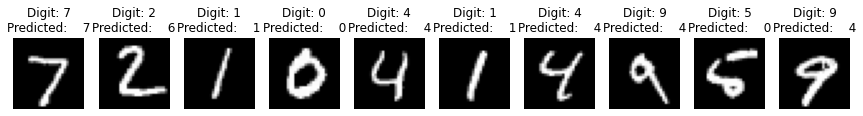

In [30]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 

for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 

plt.savefig("Grafici_1/12_2_1.png")
plt.show()

L'accuracy è minore dell'esercizio precedente

# Esercizio 12.3

In [31]:
from PIL import Image

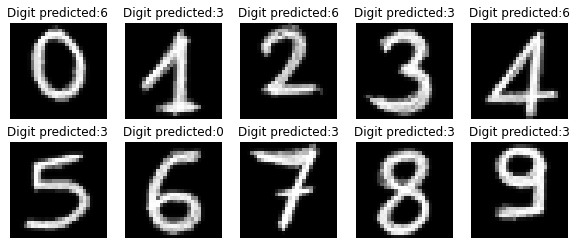

In [32]:
nome="./Numeri/"
formato= ".png"
numero=[str(n) for n in range(10)]


fig, axes=plt.subplots(nrows=2, ncols=5, figsize=(2*5, 2*2))
axes=axes.flatten()

for count, numero in zip (range(10), numero) :
    digit_filename = nome+numero+formato
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    axes[count].imshow(data, cmap='gray')
    
    if keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(1, 1, 28, 28)
    
    else:
        data = data.reshape(1, 28, 28, 1)

        
    #print(data.shape)
    pred_0 = model_CNN.predict(data)

    data = data.reshape(xdim,ydim)


    axes[count].set_title("Digit predicted:{}".format(np.argmax(pred_0)))
    axes[count].axis('off') 
    
    
plt.show()

La rete individua piuttosto male le cifre da me scritte, questo può essere dovuto sia alla scarsa accuracy ottenuta già nell'esercizio 12.2, sia alla diversità di modo di scrivere le cifre.